# AUTOMATIC NUMBER PLATE RECOGNITION

In [1]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
harcascade = "haarcascade_russian_plate_number.xml"

In [11]:
#Webcam selection
cap = cv2.VideoCapture(0)

#declaring area
cap.set(3, 640) # width
cap.set(4, 480) #height

min_area = 500
count = 0
while True:
    #reading image
    success, img = cap.read()

    plate_cascade = cv2.CascadeClassifier(harcascade)
    
    #converting the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #extracting number plate coordinates
    plates = plate_cascade.detectMultiScale(img_gray, 1.1, 4)

    for (x,y,w,h) in plates:
        area = w * h

        if area > min_area:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(img, "Number Plate", (x,y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 255), 2)

            img_roi = img[y: y+h, x:x+w]
            cv2.imshow("ROI", img_roi)


    
    cv2.imshow("Result", img)

    if cv2.waitKey(1) & 0xFF == ord('s'):
        #saving number plate as SCANNED_IMG
        cv2.imwrite("SCANNED_IMG" + str(count) + ".jpg", img_roi)
        cv2.rectangle(img, (0,200), (640,300), (0,255,0), cv2.FILLED)
        cv2.putText(img, "Plate Saved", (150, 265), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255), 2)
        cv2.imshow("Results",img)
        cv2.waitKey(500)
        count += 1

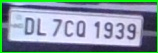

In [4]:
Image("SCANNED_IMG0.jpg")

In [5]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
output = reader.readtext("SCANNED_IMG0.jpg")

In [7]:
output

[([[20, 14], [140, 14], [140, 44], [20, 44]],
  'DL ZC0 1939',
  0.4527495761306564)]

In [8]:
number_plate = output[0][-2]

In [10]:
print('Number Plate: ',text)

Number Plate:  DL ZC0 1939
